<a href="https://colab.research.google.com/github/matildapedretti-beep/Text-Media/blob/main/INFOMTMA_Seminar1_Lab_2025_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text and Media Analytics
### Seminar 1 Lab

This is the Google Colab notebook accompanying the first lecture of the Applied Data Science Text and Media Analytics course at Utrecht University. It exemplifies **text preprocessing** and sets the stage for analysis methods based on word counts.

Some of the code is © Joris Veerbeek, taken from the [course manual](https://jveerbeek.gitlab.io/data-mining/index.html#) for this course in 2021.



# Tokenization
Everything starts at a basis. For text analytics, this is *tokenization*.

Before we can do the cool and interesting stuff (read: do the analysis) with texts, the first step - in most cases - is to tokenize them. That is, we want to convert a string, or a list of strings, into a list of tokens…

This might seem like a simple task, but there are several ways to do that, with all slightly different results.

It is very intuitive to break the text down into words, so that words are the tokens. As simple as this intuition might seem, implementing it is not so obvious. The starting point is using the space as a natural separator (delimiter) between words. Additionally, you want to separate punctuation from words, but you may want to keep some strings with punctuation together, such as abbreviations, email addresses, URLs, and words with hashtags or '@' in front of them. And that is not all; the tokenization task also blends in with the sentence detection task (not all sentences end in ., ? or !, not everything that ends in a punctuation mark is a sentence) and the detection of pairs of matching quotes. In the end, tokenization with words as tokens requires language-specific knowledge on abbreviations and specific punctuation rules. An example of an elaborate rule-based tokenizer is [Ucto](https://languagemachines.github.io/ucto/). We will get to Ucto and other similar tokenizers later.

# (Almost) pure Python
The simplest way to tokenize a text is to just use spaces as boundaries. Let’s say we have some text:

In [ ]:
text = "This is a simple sentence. Simple methods work great on simple sentences!"

Then we can just split it using Python’s `split()`.

In [ ]:
tokenized_text = text.split()
print(tokenized_text)

['This', 'is', 'a', 'simple', 'sentence.', 'Simple', 'methods', 'work', 'great', 'on', 'simple', 'sentences!']


This looks reasonable, but not great. In most cases, we at least want the punctuation removed. So let’s do that:

In [ ]:
punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
for punctuation in punctuations:
    text = text.replace(punctuation, '')
tokenized_text_nopunct = text.split()
print(tokenized_text_nopunct)


['This', 'is', 'a', 'simple', 'sentence', 'Simple', 'methods', 'work', 'great', 'on', 'simple', 'sentences']


What we want or don't want to do next depends on our goals and the analysis we want to conduct. In many cases, we would want to convert all words to lowercase:



In [ ]:
tokenized_text_lwc = [word.lower() for word in tokenized_text_nopunct]
print(tokenized_text_lwc)

['this', 'is', 'a', 'simple', 'sentence', 'simple', 'methods', 'work', 'great', 'on', 'simple', 'sentences']


Wrapping this up in a nice function:

In [ ]:
def tokenize(text):
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for punctuation in punctuations:
        text = text.replace(punctuation, '')
    text = text.lower()
    text = text.split()
    return text

tokenized_text = tokenize(text)
print(tokenized_text)

['this', 'is', 'a', 'simple', 'sentence', 'simple', 'methods', 'work', 'great', 'on', 'simple', 'sentences']


# Counting words

Once we have a tokenized text, we can count the occurence of a given word using Python’s `count`.

In [ ]:
count_this = tokenized_text.count('simple')
print(count_this)

3


To get the most frequent words of a tokenized text, we can use Python’s `Counter` objects. This returns a dictionary like object with the words stored as keys and the counts as values:

In [ ]:
from collections import Counter
tokenized_text = ['this', 'text', 'is', 'a', 'tokenized', 'text']

word_counts = Counter(tokenized_text)
word_counts

Counter({'this': 1, 'text': 2, 'is': 1, 'a': 1, 'tokenized': 1})

We can then sort this object using `most_common` to get the most frequent words:

In [ ]:
word_counts.most_common()[:20] # n = 20

[('text', 2), ('this', 1), ('is', 1), ('a', 1), ('tokenized', 1)]

When we want to get the most frequent words in a collection of texts, we have to concatenate these texts first. We can do this using the following `flatten` function:

In [ ]:
flatten = lambda t: [item for sublist in t for item in sublist]

tokenized_texts =  [['this', 'text', 'is', 'a', 'tokenized', 'text'],
                ['this', 'is', 'also', 'a', 'tokenized', 'text']]
tokenized_texts_concat = flatten(tokenized_texts)

word_counts = Counter(tokenized_texts_concat)
word_counts.most_common()[:20] # n = 20

[('text', 3), ('this', 2), ('is', 2), ('a', 2), ('tokenized', 2), ('also', 1)]

# Rule-based tokenizers

## NLTK

Instead of writing your own function, you can make use of one of the tokenizers of the NLTK package. For example, their [RegexpTokenizer](https://www.nltk.org/api/nltk.tokenize.regexp.html#nltk.tokenize.regexp.RegexpTokenizer) uses regular expressions for tokenization. The regular expression to use for tokenization is passed to the function as an argument:

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
tokenized_text = tokenizer.tokenize(text.lower())
print(tokenized_text)

['this', 'is', 'a', 'simple', 'sentence', 'simple', 'methods', 'work', 'great', 'on', 'simple', 'sentences']


## Spacy

More robust tokenization is part of the [Spacy](https://spacy.io/) pipeline (which does much more than just tokenization -- but more on that later; do check [Spacy documentation](https://spacy.io/usage/linguistic-features#how-tokenizer-works) on how their tokenizer works and how to change its behaviour by adding special rules if you want to).

Before you can use it, you have to download a model for the language of your choosing. Here is how you do it in a Colab / Jupyter Notebook (here, we pick a small English model, which is enough for our purposes):



In [ ]:
! python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


For each word in a sentence, spacy returns a ``spacy.token`` type object. There’s already quite some information stored in this object, including the token’s POS-tag, lemma, and more. We will talk more about this next week. For now, it's enough to know that the text of each token (roughly, word) can be accessed with the ``text`` attribute:

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
processed_text = nlp(text)
tokenized_text = [token.text.lower() for token in processed_text if not token.is_punct]
print(tokenized_text)

['this', 'is', 'a', 'simple', 'sentence', 'simple', 'methods', 'work', 'great', 'on', 'simple', 'sentences']


## Other types of tokenization

Ultimately, how you want to tokenize the text depends on what you want to do with it for your analysis. Often, you want your tokens to be words -- but that's not always the case. We will not look deep into other types of tokenization during this course, but it's good to know that recent transformer-based models don't typically use ``word-based tokenization``. Instead, they most often use ``subword-based tokenizers`` or -- sometimes -- ``character-based tokenizers``.

Subword tokenizers are trainable tokenizers that, given a corpus, look for frequent character sequences (like ``train``) and treat those as tokens, and split less frequent sequences into two or more tokens (like ``trainable``). This helps keep the vocabulary size smaller while not discarding rarer words as unknown. OpenAI's GPT series of models use subword tokenization. See [their online demo](https://platform.openai.com/tokenizer) or try it out below:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("openai-community/openai-gpt", clean_up_tokenization_spaces=True)
tokenized_text = tokenizer.tokenize(text)
print([x.rstrip('</w>') for x in tokenized_text])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/816k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/458k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

['this', 'is', 'a', 'simple', 'sentence', '.', 'simple', 'methods', 'work', 'great', 'on', 'simple', 'sentences', '!']


See what it's doing with a longer word though:

In [ ]:
print([x.rstrip('</w>') for x in tokenizer.tokenize('trainable')])

['tra', 'inable']


In some cases, a just treating each symbol as a token of its own might be good! Think about reasons to do so. As an example, look the tokenizer of one recent model -- ByT5 from Google -- splits up our text:

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/byt5-base", clean_up_tokenization_spaces=True)
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'a', ' ', 's', 'i', 'm', 'p', 'l', 'e', ' ', 's', 'e', 'n', 't', 'e', 'n', 'c', 'e', '.', ' ', 'S', 'i', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 't', 'h', 'o', 'd', 's', ' ', 'w', 'o', 'r', 'k', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'o', 'n', ' ', 's', 'i', 'm', 'p', 'l', 'e', ' ', 's', 'e', 'n', 't', 'e', 'n', 'c', 'e', 's', '!']


If you want to know more about different types of tokenizers, check out the [Huggingface Tokenizers guide](https://huggingface.co/docs/transformers/en/tokenizer_summary).

# Seminar 1 Exercises

A) Simple text processing

B) Pre-processing & Exploring tweets



##### A.1) Take a look at the following paragraph from a news article:

***But the origins of these reptiles have remained murky because of a lack of fossils from the earliest fliers. “The oldest pterosaur we have already had wings and were capable fliers,” said Davide Foffa, a paleontologist at Virginia Tech, which makes it difficult to chart their aerial evolution (https://www.nytimes.com/2022/10/05/science/pterosaurs-reptiles-wings.html).***

First, tokenize the sentence yourself manually (i.e,. convert into tokens manually, without any code - including the url).

In [ ]:
#answer

text = """But the origins of these reptiles have remained murky because of a lack of fossils from the earliest fliers.
“The oldest pterosaur we have already had wings and were capable fliers,” said Davide Foffa, a paleontologist at Virginia Tech,
which makes it difficult to chart their aerial evolution (https://www.nytimes.com/2022/10/05/science/pterosaurs-reptiles-wings.html)"""

tokenized_m = ['But', 'the', 'origins', 'of', 'these', 'reptiles', 'have', 'remained', 'murky', 'because', 'of', 'a', 'lack', 'of', 'fossils',
            'from', 'the', 'earliest', 'fliers', '"The', 'oldest', 'pterosaur', 'we', 'have', 'already', 'had', 'wings', 'and', 'were', 'capable',
            'fliers,"', 'said', 'Davide', 'Foffa', 'a', 'paleontologist', 'at', 'Virginia', 'Tech', 'which', 'makes', 'it', 'difficult', 'to',
            'chart', 'their', 'aerial', 'evolution', '(https://www.nytimes.com/2022/10/05/science/pterosaurs-reptiles-wings.html)']

A.2) Now use two different methods for tokenization. Compare the results and discuss the differences. Explain them based on how each method works.

In [ ]:
#First, tokenizing with Python using a function. This approach also 'cleans' the text.

def tokenize(text):
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for punctuation in punctuations:
        text = text.replace(punctuation, '')
    text = text.lower()
    text = text.split()
    return text

tokenized_py = tokenize(text)
print(tokenized_py)

['but', 'the', 'origins', 'of', 'these', 'reptiles', 'have', 'remained', 'murky', 'because', 'of', 'a', 'lack', 'of', 'fossils', 'from', 'the', 'earliest', 'fliers', '“the', 'oldest', 'pterosaur', 'we', 'have', 'already', 'had', 'wings', 'and', 'were', 'capable', 'fliers”', 'said', 'davide', 'foffa', 'a', 'paleontologist', 'at', 'virginia', 'tech', 'which', 'makes', 'it', 'difficult', 'to', 'chart', 'their', 'aerial', 'evolution', 'httpswwwnytimescom20221005sciencepterosaursreptileswingshtml']


In [ ]:
#Second, tokenizing with NLTK and Regex. Need to install and import the package.

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
tokenized_nltk = tokenizer.tokenize(text.lower())
print(tokenized_nltk)

['but', 'the', 'origins', 'of', 'these', 'reptiles', 'have', 'remained', 'murky', 'because', 'of', 'a', 'lack', 'of', 'fossils', 'from', 'the', 'earliest', 'fliers', 'the', 'oldest', 'pterosaur', 'we', 'have', 'already', 'had', 'wings', 'and', 'were', 'capable', 'fliers', 'said', 'davide', 'foffa', 'a', 'paleontologist', 'at', 'virginia', 'tech', 'which', 'makes', 'it', 'difficult', 'to', 'chart', 'their', 'aerial', 'evolution', 'https', 'www', 'nytimes', 'com', '2022', '10', '05', 'science', 'pterosaurs', 'reptiles', 'wings', 'html']


In [ ]:
#Third, tokenizing with Spacy. Need to install and import the package.

import spacy

nlp = spacy.load("en_core_web_sm")
processed_text = nlp(text.lower())

tokenized_spacy = [token.text for token in processed_text if not token.is_punct]
print(tokenized_spacy)

['but', 'the', 'origins', 'of', 'these', 'reptiles', 'have', 'remained', 'murky', 'because', 'of', 'a', 'lack', 'of', 'fossils', 'from', 'the', 'earliest', 'fliers', '\n', 'the', 'oldest', 'pterosaur', 'we', 'have', 'already', 'had', 'wings', 'and', 'were', 'capable', 'fliers', 'said', 'davide', 'foffa', 'a', 'paleontologist', 'at', 'virginia', 'tech', '\n', 'which', 'makes', 'it', 'difficult', 'to', 'chart', 'their', 'aerial', 'evolution', 'https://www.nytimes.com/2022/10/05/science/pterosaurs-reptiles-wings.html']


A.3) Compare the length of the paragraph from A.1) for different tokenization methods. Which method do you think is "correct"? How do you explain the differences?

In [ ]:
#Simply print len for the different tokenizations (for students, that will be 4 in total:
#2x with computational tokenization methods and the manual version).
#The tokenization methods deal differently with symbols and numbers, which yields different results.

print(len(tokenized_m))
print(len(tokenized_py))
print(len(tokenized_nltk))
print(len(tokenized_spacy))

49
49
60
51


A.4) Compare the ten most frequent words for the paragraph in A.1) per tokenization method (including your manual one).

In [ ]:
#First, need to install and import Collections and Counter

from collections import Counter

In [ ]:
#Manual tokenization

Counter(tokenized_m).most_common()[:10]

[('of', 3),
 ('the', 2),
 ('have', 2),
 ('a', 2),
 ('But', 1),
 ('origins', 1),
 ('these', 1),
 ('reptiles', 1),
 ('remained', 1),
 ('murky', 1)]

In [ ]:
#Python tokenization

Counter(tokenized_py).most_common()[:10]

[('of', 3),
 ('the', 2),
 ('have', 2),
 ('a', 2),
 ('but', 1),
 ('origins', 1),
 ('these', 1),
 ('reptiles', 1),
 ('remained', 1),
 ('murky', 1)]

In [ ]:
#NLTK Tokenization

Counter(tokenized_nltk).most_common()[:10]

[('the', 3),
 ('of', 3),
 ('reptiles', 2),
 ('have', 2),
 ('a', 2),
 ('fliers', 2),
 ('wings', 2),
 ('but', 1),
 ('origins', 1),
 ('these', 1)]

In [ ]:
#Spacy Tokenization

Counter(tokenized_spacy).most_common()[:10]

[('the', 3),
 ('of', 3),
 ('have', 2),
 ('a', 2),
 ('fliers', 2),
 ('\n', 2),
 ('but', 1),
 ('origins', 1),
 ('these', 1),
 ('reptiles', 1)]

B.1) Next, you will analyse some Twitter data. Here, we use a random sample of 10.000 tweets that mention "China" and "tech".

Load the data as a df. We uploaded the csv to a github repository. In order not to clone the whole repository, you can use ``wget`` to copy just the one file you need:

In [ ]:
! wget https://raw.githubusercontent.com/bylinina/TMA_seminars/refs/heads/main/CTTW.csv

--2024-11-03 15:09:13--  https://raw.githubusercontent.com/bylinina/TMA_seminars/refs/heads/main/CTTW.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17689487 (17M) [text/plain]
Saving to: ‘CTTW.csv’

CTTW.csv            100%[===================>]  16.87M  --.-KB/s    in 0.1s    

2024-11-03 15:09:14 (118 MB/s) - ‘CTTW.csv’ saved [17689487/17689487]



Below are some of the imports that may come in handy but feel free to choose your own!

In [ ]:
#imports
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter, defaultdict
from wordcloud import WordCloud
from gensim import corpora, models
import geopandas as gpd
import nltk
from nltk.corpus import stopwords
import networkx as nx

In [ ]:
#First, upload the data to the colab files system
df = pd.read_csv("/content/CTTW.csv")

B.2) Inspect the dataframe's first 20 rows and shape. It is always good to explore the data first by browsing through some of them.

In [ ]:
#The head function .head() does that in an instant. Just enter the number of rows in the brackets.
#The tail function .tail() display the last X rows.
df.head(20)

,Unnamed: 0,author id,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,in_reply_to,users,followers,tweet count,country,tags
0,0,395944523,arson03,2012-09-24 03:47:59+00:00,NaN,250079103636631552,en,0,0,0,0,http://gadgetchinos.gq,"Really ヅ nice!: UNI-T UT ."" LCD Digital Thermo...",NaN,"['ChemarieMonica', 'Zite', 'designtaxi', 'WSJ'...",1060,17888,China,[]
1,1,351057439,mikethenerd,2012-06-10 00:49:51+00:00,NaN,211621164303400960,en,0,0,0,0,twitterfeed,#tech China announces plans for major mission ...,NaN,"['girlsintech_uk', 'freaklabs', 'TechLabsSA', ...",596,4041,China,['#tech']
2,2,130473117,greenwillydot,2010-12-01 00:34:31+00:00,NaN,9767261288009728,en,0,0,0,1,Twitter Web Client,RT @YS_KARASU: WikiLeaks: Great firewall of Ch...,NaN,"['TechCrunch', 'addthis', 'Techme101', 'Metalb...",18,13960,China,[]
3,3,430757506,GradyGroup,2012-10-17 21:33:02+00:00,NaN,258682054873604097,en,0,0,0,0,dlvr.it,"Tech firm Huwei did not spy for China, White H...",NaN,"['OffbeatChina', 'Tech_Eater', 'chaz1944', 'ed...",3173,18942,China,[]
4,4,68717270,darcelchoy,2017-05-24 20:03:01+00:00,NaN,867471013340164098,en,1,0,0,0,Sprout Social,Check it out: World's largest floating #solar ...,NaN,"['AP', 'mikel_maria', 'mikellomealy', 'calesto...",1998,52710,China,['#solar']
5,5,211366198,ttscottw,2013-03-28 15:38:47+00:00,NaN,317299738250715137,en,0,0,0,0,i-love-china-tech,Rajoo X Wired Folding Headphones w/ Microphone...,NaN,"['CNNMoney', 'CNNMoney', 'FortuneMagazine', 'C...",84,105122,China,[]
6,6,2371631,ProLifePoint,2019-11-25 17:18:23+00:00,NaN,1199014480530870273,en,7,0,0,2,Twitter for Android,[Every time another detail of China's high-tec...,NaN,"['SenSchumer', 'AP', 'HPC_Guru', 'AP', 'RealSa...",121,6620,China,[]
7,7,1047341849529257984,davereaboi,2021-08-27 19:33:50+00:00,NaN,1431339189631688710,en,0,0,0,0,Twitter Web App,China is doing what every country should have ...,1.047342e+18,"['AbhishBanerj', 'Alevskey', 'Techmeme', 'Winn...",168938,210136,China,[]
8,8,256368478,newsfeeedflash,2011-11-06 16:50:44+00:00,NaN,133224811798343681,en,0,0,0,0,twitterfeed,Tech firms agree to stricter online regulation...,NaN,"['topnepalnews', 'cnni', 'cnbcworld', 'andrewb...",697,129836,China,[]
9,9,813064693,EnergiewendeGER,2013-12-29 03:36:18+00:00,NaN,417136970544857089,en,0,0,0,0,dlvr.it,must-read tech stories in China this week htt...,NaN,"['IsraelinChina', 'karmel80', 'karmel80', 'tec...",20789,31878,China,[]


In [ ]:
#The .shape method provides a quick overview of how many rows and columns there are in a dataframe.
df.shape

(10000, 19)

B.3) There might be a column that is not very useful. Remove it from the dataframe.

In [ ]:
#At least for me, there is a weird column showing up "Unnamed: 0".
#We use the drop function .drop() and indicate what column we would like to take out from the dataframe.
df = df.drop(columns=['Unnamed: 0'])
df.head()

,author id,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,in_reply_to,users,followers,tweet count,country,tags
0,395944523,arson03,2012-09-24 03:47:59+00:00,NaN,250079103636631552,en,0,0,0,0,http://gadgetchinos.gq,"Really ヅ nice!: UNI-T UT ."" LCD Digital Thermo...",NaN,"['ChemarieMonica', 'Zite', 'designtaxi', 'WSJ'...",1060,17888,China,[]
1,351057439,mikethenerd,2012-06-10 00:49:51+00:00,NaN,211621164303400960,en,0,0,0,0,twitterfeed,#tech China announces plans for major mission ...,NaN,"['girlsintech_uk', 'freaklabs', 'TechLabsSA', ...",596,4041,China,['#tech']
2,130473117,greenwillydot,2010-12-01 00:34:31+00:00,NaN,9767261288009728,en,0,0,0,1,Twitter Web Client,RT @YS_KARASU: WikiLeaks: Great firewall of Ch...,NaN,"['TechCrunch', 'addthis', 'Techme101', 'Metalb...",18,13960,China,[]
3,430757506,GradyGroup,2012-10-17 21:33:02+00:00,NaN,258682054873604097,en,0,0,0,0,dlvr.it,"Tech firm Huwei did not spy for China, White H...",NaN,"['OffbeatChina', 'Tech_Eater', 'chaz1944', 'ed...",3173,18942,China,[]
4,68717270,darcelchoy,2017-05-24 20:03:01+00:00,NaN,867471013340164098,en,1,0,0,0,Sprout Social,Check it out: World's largest floating #solar ...,NaN,"['AP', 'mikel_maria', 'mikellomealy', 'calesto...",1998,52710,China,['#solar']


B.4) Inspect the dataframe again and discuss: what kind of research questions and/or hypotheses could you investigate?

In [ ]:
# There are plenty of questions and hypotheses that one could come up with.
# What matters is that the data actually allows for raising/answering the RQs (or testing any hypotheses).
# Not everybody is used to this. It's useful to probe how SMART a proposition is
# (SMART = Specific, Measurable, Achievable, Realistic, Time-based)
# There is of course a lot that can be done on topcis/frames/themes/sentiment/user interaciton/networks.

B.5) Create a timeline of tweets over years - first converst the string date-time to datetime, then create a line graph. Take some notes of your observations.


In [ ]:
# First, convert the string to actual datetime.
# For this, the pd.to_datetime function is quite handy: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

#convert string date-time to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

<ipython-input-19-31978d19eb2c>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tweets_time = df.groupby(pd.Grouper(key='created_at', freq='Y', convention='start')).size()


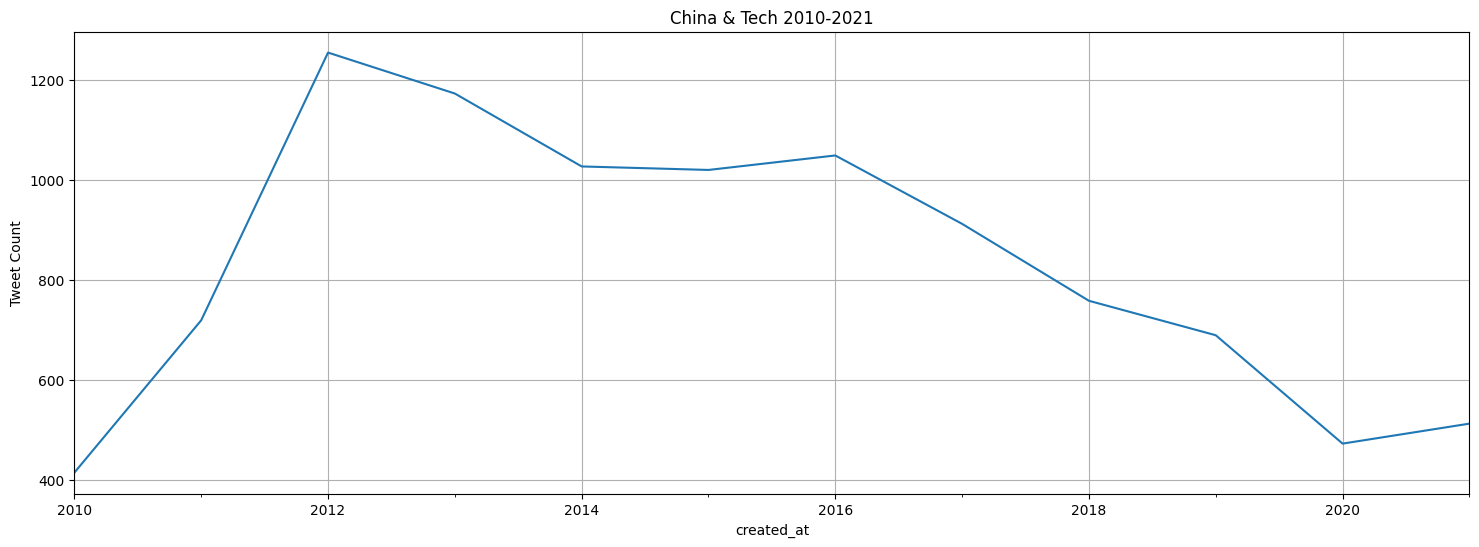

In [ ]:
# There are various ways to creat a timeline, this is just one suggestion.
# What we want to see is years on the x-axis and tweet frequencies on the y-axis.
# In the solution below, the .groupby funtion and Panda's Grouper are used: https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html

#Create graph for tweets per Y/M/D - just change variable "freq"!
tweets_time = df.groupby(pd.Grouper(key='created_at', freq='Y', convention='start')).size()
tweets_time.plot(figsize=(18,6))
plt.ylabel('Tweet Count')
plt.title('China & Tech 2010-2021')
plt.grid(True)

***Note: Exercises B.6) to B.11) are all about pre-processing and "cleaning" text. If you're advanced in your Python for text analysis, feel free to address all of the steps below in one piece of code.***

B.6) Convert the words in the tweets to lowercase. Create a new column for that to keep the original tweets.

In [ ]:
#code
df["tweet2"] = df["tweet"].str.lower()

df.head(5)

,author id,username,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,in_reply_to,users,followers,tweet count,country,tags,tweet2
0,395944523,arson03,2012-09-24 03:47:59+00:00,NaN,250079103636631552,en,0,0,0,0,http://gadgetchinos.gq,"Really ヅ nice!: UNI-T UT ."" LCD Digital Thermo...",NaN,"['ChemarieMonica', 'Zite', 'designtaxi', 'WSJ'...",1060,17888,China,[],"really ヅ nice!: uni-t ut ."" lcd digital thermo..."
1,351057439,mikethenerd,2012-06-10 00:49:51+00:00,NaN,211621164303400960,en,0,0,0,0,twitterfeed,#tech China announces plans for major mission ...,NaN,"['girlsintech_uk', 'freaklabs', 'TechLabsSA', ...",596,4041,China,['#tech'],#tech china announces plans for major mission ...
2,130473117,greenwillydot,2010-12-01 00:34:31+00:00,NaN,9767261288009728,en,0,0,0,1,Twitter Web Client,RT @YS_KARASU: WikiLeaks: Great firewall of Ch...,NaN,"['TechCrunch', 'addthis', 'Techme101', 'Metalb...",18,13960,China,[],rt @ys_karasu: wikileaks: great firewall of ch...
3,430757506,GradyGroup,2012-10-17 21:33:02+00:00,NaN,258682054873604097,en,0,0,0,0,dlvr.it,"Tech firm Huwei did not spy for China, White H...",NaN,"['OffbeatChina', 'Tech_Eater', 'chaz1944', 'ed...",3173,18942,China,[],"tech firm huwei did not spy for china, white h..."
4,68717270,darcelchoy,2017-05-24 20:03:01+00:00,NaN,867471013340164098,en,1,0,0,0,Sprout Social,Check it out: World's largest floating #solar ...,NaN,"['AP', 'mikel_maria', 'mikellomealy', 'calesto...",1998,52710,China,['#solar'],check it out: world's largest floating #solar ...


B.7) Remove the numbers from the tweets.

In [ ]:
# You can work with string.digits for this operation.

import string

df['tweet2'] = df['tweet2'].str.translate(str.maketrans(' ', ' ', string.digits))

B.8) Remove punctuation from the tweets.

In [ ]:
# You can use string.punctuation

df['tweet2'] = df['tweet2'].str.translate(str.maketrans(' ', ' ', string.punctuation))

B.9) Strip excessive white spaces from the tweets.

In [ ]:
#Some info on .strip() https://www.simplilearn.com/tutorials/python-tutorial/strip-in-python

df['tweet2'] = df['tweet2'].str.strip()

B.10) Remove the stopwords from the tweets. Compare your "cleaned-up" tweets with the originals.

In [ ]:
# We're using NLTK's stopword list for English.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['tweet2'] = df['tweet2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Let's compare original and processed tweets to see if it all worked out.

df[['tweet', 'tweet2']].head(10)

,tweet,tweet2
0,"Really ヅ nice!: UNI-T UT ."" LCD Digital Thermo...",really ヅ nice unit ut lcd digital thermometers...
1,#tech China announces plans for major mission ...,tech china announces plans major mission space...
2,RT @YS_KARASU: WikiLeaks: Great firewall of Ch...,rt yskarasu wikileaks great firewall china blo...
3,"Tech firm Huwei did not spy for China, White H...",tech firm huwei spy china white house review e...
4,Check it out: World's largest floating #solar ...,check worlds largest floating solar power plan...
5,Rajoo X Wired Folding Headphones w/ Microphone...,rajoo x wired folding headphones w microphone ...
6,[Every time another detail of China's high-tec...,every time another detail chinas hightech brut...
7,China is doing what every country should have ...,china every country tech companies years ago i...
8,Tech firms agree to stricter online regulation...,tech firms agree stricter online regulations x...
9,must-read tech stories in China this week htt...,mustread tech stories china week httptcorjxwwzzsz


B.11) Tokenize the tweets.


In [ ]:
#As seen in A), there are different methods. We use NLTK below but others are fine, too.

import nltk
nltk.download('punkt')
df['tweets_tokenized'] = df.apply(lambda column: nltk.word_tokenize(column['tweet2']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


B.12) Create a wordcloud visual based on hashtags. A for-loop might do the trick.

(-0.5, 399.5, 199.5, -0.5)

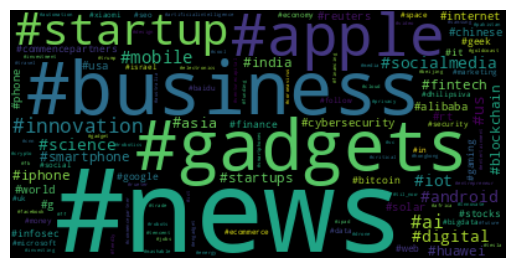

In [ ]:
# Like Atteveldt et al. (2022), let's use a for-loop to retrieve the hashtags and put them into a
# defaultdict (https://www.geeksforgeeks.org/defaultdict-in-python/)
# For wordcloud documentation: https://amueller.github.io/word_cloud/
# Let's exclude the search terms #china and #tech
# Such choices and their consequences can be discussed

freq = defaultdict(int)

for tweet in df["tweet"]:
    for tag in re.findall("#\w+", tweet.lower()):
        if not re.search("#china|#tech", tag):
            freq[tag]+=1
wc = WordCloud().generate_from_frequencies(freq)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

B.13) Discuss the wordcloud - what can it tell you, what are limitations? What hashtags would you filter out and why?

In [ ]:
# Word clouds can look nice and have some exploratory value but are otherwise not very useful for research.

B.14) Create a list of the top 10 most frequent hashtags.

In [ ]:
# Same as above but instead of a word cloud, a list is created (this time #news is filtered out as well).

freq = defaultdict(int)

for tweet in df["tweet"]:
    for tag in re.findall("#\w+", tweet.lower()):
        if not re.search("#china|#tech|#news", tag):
            freq[tag]+=1

Counter(freq).most_common()[:10]

[('#business', 126),
 ('#gadgets', 114),
 ('#apple', 87),
 ('#startup', 83),
 ('#innovation', 75),
 ('#ai', 70),
 ('#mobile', 64),
 ('#us', 56),
 ('#science', 55),
 ('#socialmedia', 54)]

B.15) Create a list of the top 10, 20, and 50 user-accounts. Whos is tweeting about "China" & "tech"?

In [ ]:
# Simple counter - adjust values as needed.

Counter(df['username']).most_common()[:10]

[('CitizenZhao', 21),
 ('arson03', 18),
 ('danny_taylor68', 18),
 ('googlenews', 15),
 ('AusTechNews', 15),
 ('newsfeeedflash', 14),
 ('Vrikson_Acosta', 14),
 ('techmashup', 14),
 ('SanFranJobsTV', 14),
 ('NiuB', 14)]